## Hypothesis Testing
Used to infer the result of a hypothesis performed on sample data from a larger population. The test tells the analyst whether or not his primary hypothesis is true. 

> Statistical analysts test a hypothesis by measuring and examining a random sample of the population being analyzed 


Here are the steps on how we would do this

1. Compute test statistic
2. Define null hypothesis
3. Compute p-value - *is the probability for a given statistical model that, when the null hypothesis is true*
4. Interpret the result

If p-value is very low(most often than now, below 0.05), the effect is considered statistically significant. That means that effect is unlikely to have occured by chance. The inference? The effect is likely to be seen in the population too. 

This process is very similar to the *proof by contradiction* paradigm. We first assume that the effect is false. That's the null hypothesis. Next step is to compute the probability of obtaining that effect (the p-value). If p-value is very low(<0.05 as a rule of thumb), we reject the null hypothesis. 

In [2]:
# Load packages
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [3]:
# Load our data
df = pd.read_csv('Mall_Customers.csv')
df.rename(columns={'CustomerID':'id','Spending Score (1-100)':'score','Annual Income (k$)':'income'},inplace=True)
df.head() # Visualize first 5 rows of data

,id,Gender,Age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Question: Do male customers tend to spend more compared to female customers ?

Below is the process of answering such questions:
- __Translate natural language question to Mathematical Question__
    - Spending by Males - Spending by Females > 0
<br>
<br>
- __Form Hypothesis__
    - Ho ( Null Hypothesis): It is the default statement, in our case<br>
        __H0__ : Spending by Females - Spending by Male >= 0
    - Ha (Alternate Hypothesis): it is the statement we want to prove <br>
        __Ha__ : Spending by Male - Spending by Females > 0
<br>
<br>
- __Define Confidence Interval__
It is the confidence with which the null hypothesis is expected to be true.
<img style="float: left;" src = './img/hypothesis_test.gif'>


__alpha__ = Significance level: of a test is a __threshold of probability α__ agreed to before the test is conducted. A typical value of __α is 0.05__ <br>
__z-score (aka, a standard score)__ indicates how many __standard deviations__ an element is from the __mean__. A z-score can be calculated from the following formula.<br>
>__z = (X - μ) / σ__ <br>
where, σ standard deviation , μ - Mean <br>
In Standard Normal Distribution: mean = 0 and standard deviaiton = 1

- __Selection Criteria__
 - Select appropriate statistcal test
 - if p value >= 0.05 then reject Ha| Ho is likely to be true
 - if p value < 0.05 then reject Ho | Ha is likely to be true
<br>
<br>
- Perform **t-test** and determine the p-value to answer our questions

In [4]:
maleSpend = df[df['Gender'] == 'Male']
# maleSpend.shape to print [rows x colums] of data
femaleSpend = df[df['Gender'] == 'Female']
stats.ttest_ind(maleSpend['score'], femaleSpend.score, equal_var=True)

Ttest_indResult(statistic=-0.8190464150660333, pvalue=0.4137446589852176)

p-value As p value is > 0.05 , we do not have enough evidence to reject Ho. Hence we reject Ha .<br>

Finale piece in the puzzle is to translate the mathematical statement to Natural Language for humans to understand :)
<br>
<br>
__Conclusion__ With the limited sample of 200 examples we cannot conclude that male spend more than feamles.

/Users/paragpradhan/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


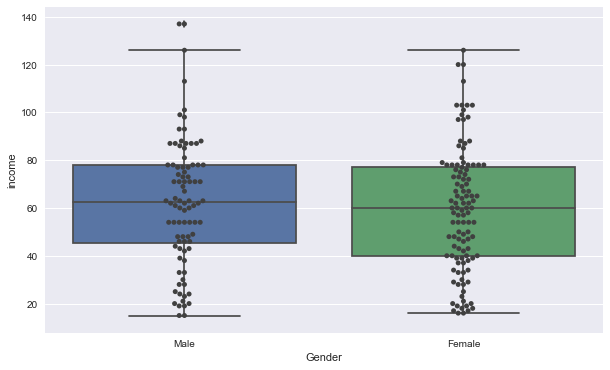

In [22]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(6)
x = sns.boxplot(x="Gender", y="income", data=df)
x = sns.swarmplot(x="Gender", y="income", data=df,color=".25")

### Reference for deep dive in Statistics & Probability
__Khan Academy Theory:__ https://www.khanacademy.org/math/statistics-probability/significance-tests-one-sample <br>
<br>
__Python Scipy package for coding statistical tests:__ https://docs.scipy.org/doc/scipy/reference/stats.html?highlight=stats#statistical-tests <br>
<br>
__Python Seaborn package for visualizing data:__ https://seaborn.pydata.org/tutorial.html